## Unpacking and Analyzing Netflix Content Data

##### Objective:
To preprocess and analyze the Netflix dataset to uncover insights about the content available on the platform. This involves transforming the nested columns (director, cast, country, listed_in, description) into individual records, filling null values, and identifying trends and patterns in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Imported all necessary libraries

In [2]:
df = pd.read_csv("netflix.csv") # Reading the file

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

This dataset contains 12 columns and 8,807 rows

In [ ]:
df.describe()

Numerical Column details

In [ ]:
df.info()

This dataset contains 12 columns and 8,807 rows, with 1 integer column and 11 object columns.

In [ ]:
df.isna().sum()

In [ ]:
missing_values = df.isna().sum().reset_index()
missing_values.columns = ['column_name', 'missing_values']

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.barplot(y='missing_values', x='column_name', data=missing_values)
plt.title('Number of Missing Values by Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Column')
plt.xticks(rotation=90, fontsize=10)
plt.show()

The columns with the most null values are Director, Country, and Cast.

In [9]:
print("total null values is",df.isna().sum().sum())

total null values is 4307


### Data Preprocessing

##### Un-nesting the columns

In [10]:
dfc = df[["title",'cast']]
dfc["cast"] =dfc["cast"].str.split(",")
dfc = dfc.explode('cast').reset_index(drop=True)

C:\Users\adhar\AppData\Local\Temp\ipykernel_18180\1748737817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfc["cast"] =dfc["cast"].str.split(",")


In [11]:
dfc.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [12]:
dfd = df[["title",'director']]
dfd["director"] =dfd["director"].str.split(",")
dfd = dfd.explode('director').reset_index(drop=True)

C:\Users\adhar\AppData\Local\Temp\ipykernel_18180\2607028502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd["director"] =dfd["director"].str.split(",")


In [13]:
dfd.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN


In [14]:
dfcountry = df[["title",'country']]
dfcountry["country"] =dfcountry["country"].str.split(",")
dfcountry = dfcountry.explode('country').reset_index(drop=True)
dfcountry.head()

C:\Users\adhar\AppData\Local\Temp\ipykernel_18180\4224137055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcountry["country"] =dfcountry["country"].str.split(",")


,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India


In [15]:
dfg = df[["title",'listed_in']]
dfg["listed_in"] =dfg["listed_in"].str.split(",")
dfg = dfg.explode('listed_in').reset_index(drop=True)
dfg.head()

C:\Users\adhar\AppData\Local\Temp\ipykernel_18180\2430494266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfg["listed_in"] =dfg["listed_in"].str.split(",")


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


##### Merging all Un-nested columns into single DataFrame

In [16]:
Unnest_df = dfc.merge(dfd,on="title",how="left")

In [17]:
Unnest_df = Unnest_df.merge(dfcountry,on="title",how="left")

In [18]:
Unnest_df = Unnest_df.merge(dfg,on="title",how="left")
Unnest_df.tail()

,title,cast,director,country,listed_in
202060,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
202061,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies
202064,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Music & Musicals


In [19]:
final_df = df.merge(Unnest_df,on="title",how="left")
final_df.drop(columns = ["director_x","cast_x","country_x","listed_in_x"],inplace = True) # Dropped Nested Columns
final_df.rename(columns = {"director_y":"director","cast_y":"cast","country_y":"country","listed_in_y":"listed_in"},inplace=True)

In [20]:
final_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",NaN,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,NaN,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,NaN,South Africa,International TV Shows


##### Removing all duplicate Columns

In [21]:
final_df.drop_duplicates(keep = "first",inplace=True)

In [22]:
final_df["date_added"] = final_df["date_added"].str.strip() #Removing Extra Space in date column

In [23]:
final_df["date_added"]=pd.to_datetime(final_df["date_added"],format="%B %d, %Y",errors='coerce') # Converted into DATETIME Foramt/

In [24]:
final_df.shape

(202058, 12)

In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202058 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202058 non-null  object        
 1   type          202058 non-null  object        
 2   title         202058 non-null  object        
 3   date_added    201900 non-null  datetime64[ns]
 4   release_year  202058 non-null  int64         
 5   rating        201991 non-null  object        
 6   duration      202055 non-null  object        
 7   description   202058 non-null  object        
 8   cast          199909 non-null  object        
 9   director      151415 non-null  object        
 10  country       190161 non-null  object        
 11  listed_in     202058 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


##### After Un-nest the total rows got increased from 8807 to 202065.

### Handling Null values

In [26]:
final_df.isna().sum()

show_id             0
type                0
title               0
date_added        158
release_year        0
rating             67
duration            3
description         0
cast             2149
director        50643
country         11897
listed_in           0
dtype: int64

In [27]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [28]:
final_df["director"].fillna("Unknown director",inplace=True) #Director Column Null values filled with Unknown Director
final_df["cast"].fillna("Unknown Actor",inplace=True)        #Cast Column Null values filled with Unknown Cast
final_df["country"].fillna("Unknown country",inplace=True)   #Country Column Null values filled with Unknown Country
final_df["rating"].fillna("Unknown rating",inplace=True)     #Rating Column Null values filled with Unknown Rating
final_df["duration"].fillna(final_df["rating"],inplace=True) #Duration Column Null values filled with rating Column Values
#final_df["date_added"].fillna(final_df["release_year"],inplace=True)

In [29]:
final_df["new_duration"]=final_df["duration"].str.split(" ").str[0] # Getting only numaric value in Columns by splitting the data
final_df.drop(columns = ["duration"],inplace = True) # Dropped duration Columns

In [30]:
final_df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'Unknown rating', 'TV-Y7-FV', 'UR'], dtype=object)

In [31]:
final_df["rating"].value_counts()

rating
TV-MA             73915
TV-14             43951
R                 25859
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown rating       67
74 min                1
84 min                1
66 min                1
Name: count, dtype: int64

In [32]:
#Replaced Unrelated values into unknown Rating.
replace_dict = {"74 min":'Unknown rating', '84 min':'Unknown rating', '66 min':'Unknown rating'} 
final_df['rating'] = final_df['rating'].replace(replace_dict)
final_df["rating"].value_counts()

rating
TV-MA             73915
TV-14             43951
R                 25859
PG-13             16246
TV-PG             14926
PG                10919
TV-Y7              6304
TV-Y               3665
TV-G               2779
NR                 1573
G                  1530
NC-17               149
TV-Y7-FV             86
UR                   86
Unknown rating       70
Name: count, dtype: int64

All the null values are filled and
I filled the null values in the Duration column with the values from the Rating column and 
replaced the Rating column with 'Unknown Rating' because some Duration values were present in the Rating column

#### Find the counts of each categorical variable both using graphical and non-graphical analysis.

###### Total count of movies and Tv Shows

In [33]:
show_type = final_df[["type","title"]].drop_duplicates(subset=["title","type"],keep = "first")

In [34]:
show_type["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

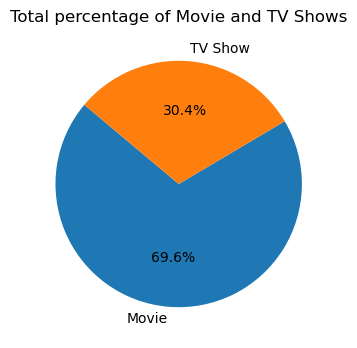

In [35]:
show_types = show_type["type"].value_counts().reset_index()
show_types.columns = ['type', 'count']
show_types = show_types.sort_values(by='count', ascending=False)
plt.figure(figsize=(4, 4))
plt.pie(show_types['count'], labels=show_types['type'], autopct='%1.1f%%', startangle=140)
plt.title('Total percentage of Movie and TV Shows')
plt.show()

Total movies are 6131 and TV Show 2676

##### Rating column Counts

In [36]:
rating_count = final_df[["title","rating"]].drop_duplicates(subset=["title","rating"],keep="first")

In [37]:
rating_count["rating"].value_counts()

rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
Unknown rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
Name: count, dtype: int64

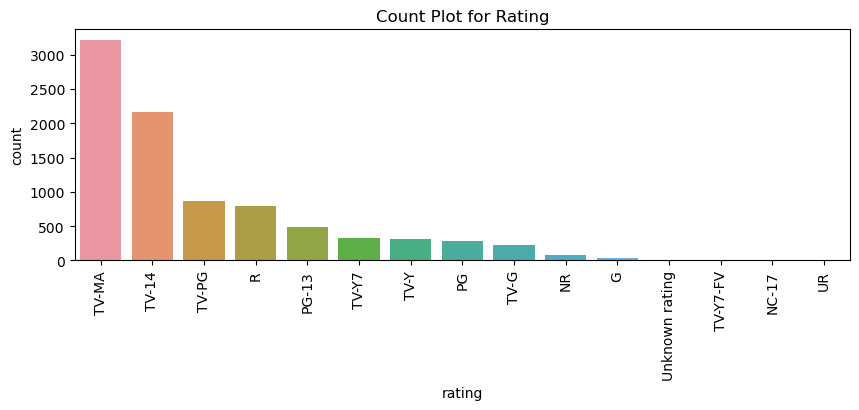

In [38]:
rating_counts = rating_count['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']
rating_counts = rating_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 3))
sns.barplot(x='rating', y='count', data=rating_counts)
plt.xticks(rotation=90, fontsize=10)
plt.title('Count Plot for Rating')
plt.show()

##### Most of the Movies and Tv Shows falling in TV-MA Category and UR Category is having least.

##### Country Count Distrubution

In [39]:
Country_count = final_df[["country","title"]].drop_duplicates(subset=["country","title"],keep = "first")

In [40]:
Country_count["country"].value_counts().head(10)

country
United States      3211
India              1008
Unknown country     831
United Kingdom      628
 United States      479
Canada              271
Japan               259
France              212
South Korea         211
 France             181
Name: count, dtype: int64

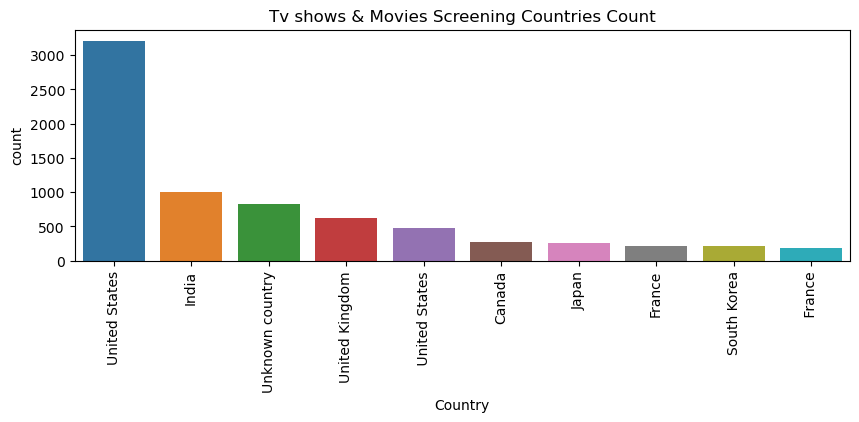

In [41]:
Country_counts = Country_count['country'].value_counts().reset_index().head(10)
Country_counts.columns = ['Country', 'count']
Country_counts = Country_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(10, 3))
sns.barplot(x='Country', y='count', data=Country_counts)
plt.xticks(rotation=90, fontsize=10)
plt.title('Tv shows & Movies Screening Countries Count')
plt.show()

Top 10 contries of movies & TV shows distrubution, Unknown Coutry is having 3rd place in this

In [42]:
release_year_count = final_df[["release_year","title"]].drop_duplicates(subset=["release_year","title"],keep = "first")
release_year_count["release_year"].value_counts().head(10)

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

C:\Users\adhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adhar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


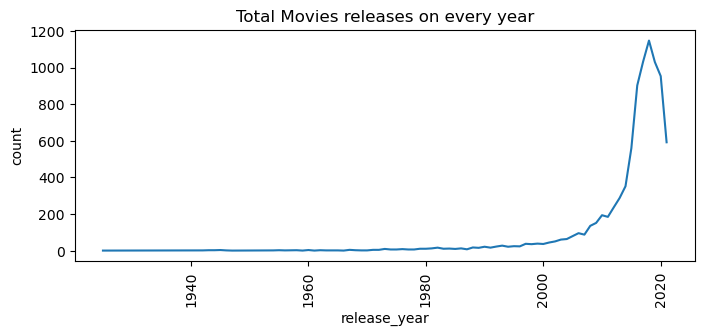

In [43]:
release_year_counts = release_year_count['release_year'].value_counts().reset_index()
release_year_counts.columns = ['release_year', 'count']
release_year_counts = release_year_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 3))
sns.lineplot(x='release_year', y='count', data=release_year_counts)
plt.xticks(rotation=90, fontsize=10)
plt.title('Total Movies releases on every year')
plt.show()

From 2000 to 2018, the number of movie releases gradually increased, reaching its peak in 2018. After 2018, the number of movie releases decreased.

In [44]:
listed_in_count = final_df[["listed_in","title"]].drop_duplicates(subset=["listed_in","title"],keep = "first")
listed_in_count["listed_in"].value_counts()

listed_in
 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: count, Length: 73, dtype: int64

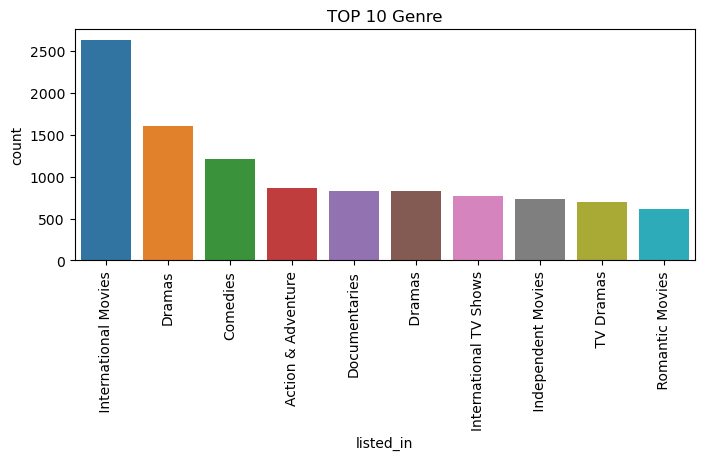

In [45]:
listed_in_counts = listed_in_count['listed_in'].value_counts().reset_index().head(10)
listed_in_counts.columns = ['listed_in', 'count']
listed_in_counts = listed_in_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 3))
sns.barplot(x='listed_in', y='count', data=listed_in_counts)
plt.xticks(rotation=90, fontsize=10)
plt.title('TOP 10 Genre')
plt.show()

In Top 10 Movie Genres, Internation Movies is having highest movie release genre.

In [46]:
cast_count = final_df[["cast","title"]].drop_duplicates(subset=["cast","title"],keep = "first")
cast_count["cast"].value_counts()

cast
Unknown Actor             825
 Anupam Kher               39
 Rupa Bhimani              31
 Takahiro Sakurai          30
 Julie Tejwani             28
                         ... 
 Vedika                     1
 Tedros Teclebrhan          1
 Maryam Zaree               1
 Melanie Straub             1
 Chittaranjan Tripathy      1
Name: count, Length: 39297, dtype: int64

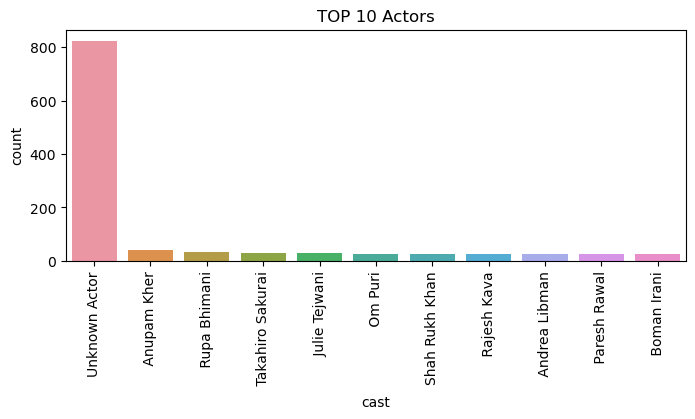

In [47]:
cast_counts = cast_count['cast'].value_counts().reset_index().head(11)
cast_counts.columns = ['cast', 'count']
cast_counts = cast_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 3))
sns.barplot(x='cast', y='count', data=cast_counts)
plt.xticks(rotation=90, fontsize=10)
plt.title('TOP 10 Actors')
plt.show()

Except for unknown actors, we identified the top 10 actors who appeared in the most movies and TV shows.

In [48]:
director_count = final_df[["director","title"]].drop_duplicates(subset=["director","title"],keep = "first")
director_count["director"].value_counts()

director
Unknown director    2634
Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Marcus Raboy          16
                    ... 
Eric Bross             1
Will Eisenberg         1
Marina Seresesky       1
Kenny Leon             1
Mozez Singh            1
Name: count, Length: 5121, dtype: int64

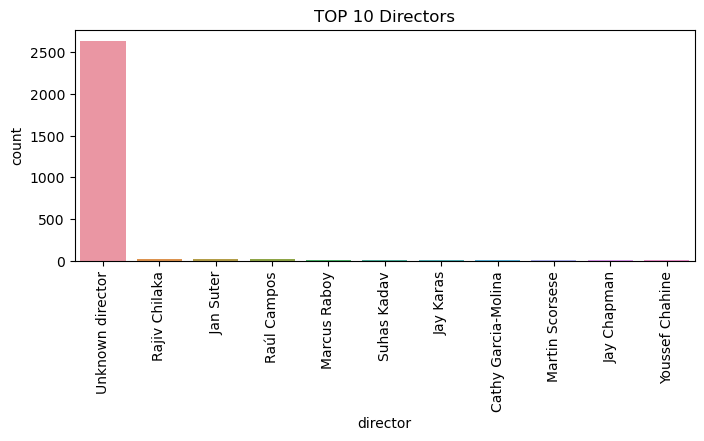

In [49]:
director_counts = director_count['director'].value_counts().reset_index().head(11)
director_counts.columns = ['director', 'count']
director_counts = director_counts.sort_values(by='count', ascending=False)
plt.figure(figsize=(8, 3))
sns.barplot(x='director', y='count', data=director_counts)
plt.xticks(rotation=90, fontsize=10)
plt.title('TOP 10 Directors')
plt.show()

TOP 10 Directors, Most of the title we don't have an directors name.

#### TOP Countries that produced movies & TV Shows.

In [50]:
type_count = final_df[["country","title","type"]].drop_duplicates(subset=["country","title","type"],keep = "first").reset_index()

In [51]:
movie=type_count.loc[type_count["type"]=="Movie"]

In [52]:
movie.groupby("country")["type"].count().sort_values(ascending= False).reset_index().head(10)

,country,type
0,United States,2364
1,India,927
2,Unknown country,440
3,United States,388
4,United Kingdom,382
5,Canada,187
6,France,155
7,United Kingdom,152
8,France,148
9,Canada,132


Inference:- Top 10 movie-producing countries and the USA has produced the highest number of movies.

#### TOP 10 TV Shows Producing Countries

In [53]:
TV_Shows=type_count.loc[type_count["type"]=="TV Show"]

In [54]:
TV_Shows.groupby("country")["type"].count().sort_values(ascending= False).reset_index().head(10)

,country,type
0,United States,847
1,Unknown country,391
2,United Kingdom,246
3,Japan,174
4,South Korea,164
5,United States,91
6,Canada,84
7,India,81
8,Taiwan,70
9,France,64


Inference :-Top 10 TV Shows-producing countries and the USA has produced the highest number of TV Shows.

The USA has produced the highest number of movies and TV shows. 

### Most Movies & TV Shows relases on week of the day

In [55]:
final_df["week"] = final_df["date_added"].dt.day_of_week

In [56]:
final_df.head()

,show_id,type,title,date_added,release_year,rating,description,cast,director,country,listed_in,new_duration,week
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",Unknown Actor,Kirsten Johnson,United States,Documentaries,90,5.0
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,International TV Shows,2,4.0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Dramas,2,4.0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Mysteries,2,4.0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,International TV Shows,2,4.0


In [57]:
final_df["week"].unique()

array([ 5.,  4.,  3.,  2.,  1.,  0.,  6., nan])

In [58]:
week_names = { 5.:"Saturday",  4.:"Friday",  3.:"Thursday",  2.:"Wednesday",  1.:"Tuesday",  0.:"Monday",  6.:"Sunday"}
final_df['week'] = final_df['week'].replace(week_names)

In [59]:
week_df = final_df[["title","week","type"]].drop_duplicates(subset=["title","week","type"],keep = "first").reset_index(drop=True)

In [60]:
combined_grouped = week_df.groupby(['week', 'type']).size().reset_index(name='count')

In [61]:
combined_grouped.head()

,week,type,count
0,Friday,Movie,1566
1,Friday,TV Show,932
2,Monday,Movie,628
3,Monday,TV Show,223
4,Saturday,Movie,557


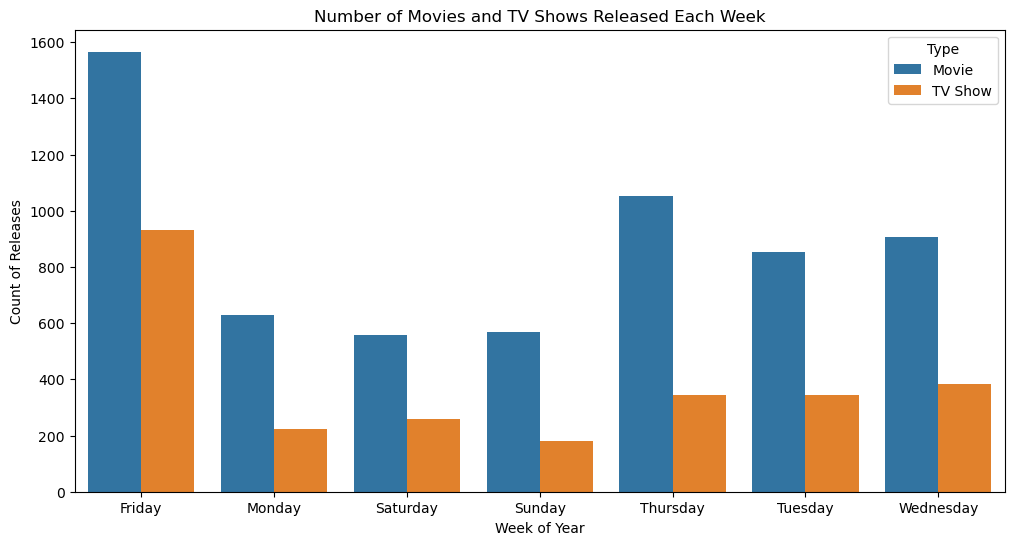

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x='week', y='count', hue='type', data=combined_grouped)
plt.title('Number of Movies and TV Shows Released Each Week')
plt.xlabel('Week of Year')
plt.ylabel('Count of Releases')
plt.legend(title='Type')
plt.show()

##### Inference: Based on the data, most movies and TV shows are released on Friday. Therefore, the best days to release a movie or TV show are Friday or Thursday..

### Movie releases on month wise.

In [63]:
final_df["month"] = final_df["date_added"].dt.month

In [64]:
final_df.head()

,show_id,type,title,date_added,release_year,rating,description,cast,director,country,listed_in,new_duration,week,month
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",Unknown Actor,Kirsten Johnson,United States,Documentaries,90,Saturday,9.0
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,International TV Shows,2,Friday,9.0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Dramas,2,Friday,9.0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Mysteries,2,Friday,9.0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,International TV Shows,2,Friday,9.0


In [65]:
month_df = final_df[["title","month","type"]].drop_duplicates(subset=["title","month","type"],keep = "first").reset_index(drop=True)

In [66]:
combined_grouped = month_df.groupby(['month', 'type']).size().sort_values(ascending=False).reset_index(name='count')
combined_grouped.head()

,month,type,count
0,7.0,Movie,565
1,4.0,Movie,550
2,12.0,Movie,547
3,1.0,Movie,546
4,10.0,Movie,545


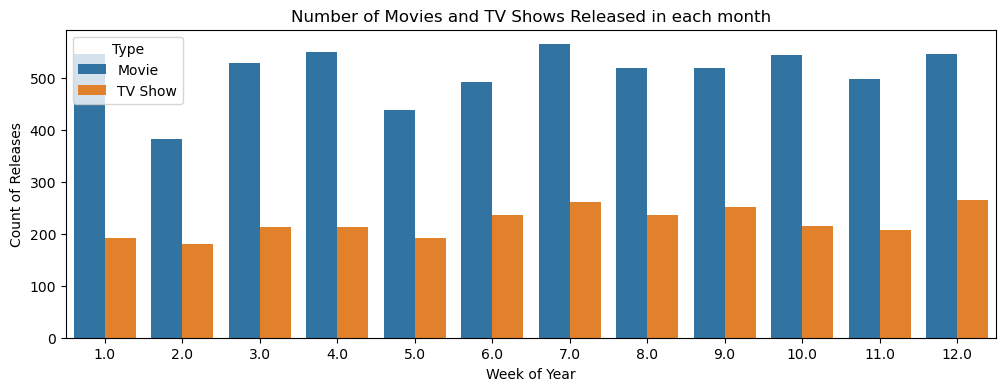

In [67]:
plt.figure(figsize=(12, 4))
sns.barplot(x='month', y='count', hue='type', data=combined_grouped)
plt.title('Number of Movies and TV Shows Released in each month')
plt.xlabel('Week of Year')
plt.ylabel('Count of Releases')
plt.legend(title='Type')
plt.show()

##### Inference: The release count of most movies and TV shows is almost equally distributed across all months, with only minor differences in movie releases in February and May.

#### Top 10 directors who have appeared in most movies or TV shows.

In [68]:
directors= final_df[["type","director","title"]].drop_duplicates(subset=["type","director","title"],keep = "first").reset_index(drop=True)

In [69]:
directors.head()

,type,director,title
0,Movie,Kirsten Johnson,Dick Johnson Is Dead
1,TV Show,Unknown director,Blood & Water
2,TV Show,Julien Leclercq,Ganglands
3,TV Show,Unknown director,Jailbirds New Orleans
4,TV Show,Unknown director,Kota Factory


In [70]:
directors.shape

(9612, 3)

In [71]:
Directors_Group = directors.groupby(['director', 'type']).size().sort_values(ascending=False).reset_index(name='count')

In [72]:
TV_Show_directors = Directors_Group.loc[Directors_Group["type"]=="TV Show"].reset_index(drop=True)

In [73]:
movie_directors = Directors_Group.loc[Directors_Group["type"]=="Movie"].reset_index(drop=True)

In [74]:
TV_Show_directors.head(11)

,director,type,count
0,Unknown director,TV Show,2446
1,Alastair Fothergill,TV Show,3
2,Ken Burns,TV Show,3
3,Hsu Fu-chun,TV Show,2
4,Iginio Straffi,TV Show,2
5,Shin Won-ho,TV Show,2
6,Rob Seidenglanz,TV Show,2
7,Stan Lathan,TV Show,2
8,Jung-ah Im,TV Show,2
9,Joe Berlinger,TV Show,2


##### Inference: Most of the data points have null values in the directors column. Among the available data, Alastair Fothergill has directed the most TV shows on Netflix.

In [75]:
movie_directors.head(10)

,director,type,count
0,Unknown director,Movie,188
1,Rajiv Chilaka,Movie,22
2,Raúl Campos,Movie,18
3,Jan Suter,Movie,18
4,Suhas Kadav,Movie,16
5,Marcus Raboy,Movie,15
6,Jay Karas,Movie,15
7,Cathy Garcia-Molina,Movie,13
8,Youssef Chahine,Movie,12
9,Martin Scorsese,Movie,12


##### Inference: Most of the data points have null values in the directors column. Among the available data, Rajiv Chilaka has directed the most Movies on Netflix.

#### Top 10 Actors who have appeared in most movies and TV shows.

In [76]:
cast= final_df[["type","cast","title"]].drop_duplicates(subset=["type","cast","title"],keep = "first").reset_index(drop=True)

In [77]:
cast_group = cast.groupby(["cast","type"])["title"].size().sort_values(ascending=False).reset_index(name='count')

In [78]:
TV_Show_cast = cast_group.loc[cast_group["type"]=="TV Show"].reset_index(drop=True)
movie_cast= cast_group.loc[cast_group["type"]=="Movie"].reset_index(drop=True)

In [79]:
TV_Show_cast.head(11)

,cast,type,count
0,Unknown Actor,TV Show,350
1,Takahiro Sakurai,TV Show,24
2,Junichi Suwabe,TV Show,17
3,Ai Kayano,TV Show,17
4,Yuki Kaji,TV Show,17
5,David Attenborough,TV Show,14
6,Daisuke Ono,TV Show,14
7,Yuichi Nakamura,TV Show,13
8,Yoshimasa Hosoya,TV Show,13
9,Takehito Koyasu,TV Show,13


###### Inference: Most of the data points have null values in the Cast column. Among the available data, Takahiro Sakurai has Acted the most TV shows on Netflix.

In [80]:
movie_cast.head(11)

,cast,type,count
0,Unknown Actor,Movie,475
1,Anupam Kher,Movie,38
2,Rupa Bhimani,Movie,27
3,Om Puri,Movie,27
4,Shah Rukh Khan,Movie,26
5,Paresh Rawal,Movie,25
6,Boman Irani,Movie,25
7,Julie Tejwani,Movie,24
8,Akshay Kumar,Movie,23
9,Rajesh Kava,Movie,21


###### Inference: Most of the data points have null values in the cast column. Among the available data, Anupam Kher has acted the most Movies on Netflix.

####  genre movies are more popular or produced more

In [81]:
final_df.head()

,show_id,type,title,date_added,release_year,rating,description,cast,director,country,listed_in,new_duration,week,month
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",Unknown Actor,Kirsten Johnson,United States,Documentaries,90,Saturday,9.0
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,International TV Shows,2,Friday,9.0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Dramas,2,Friday,9.0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Mysteries,2,Friday,9.0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,International TV Shows,2,Friday,9.0


In [82]:
genre= final_df[["listed_in","title"]].drop_duplicates(subset=["listed_in","title"],keep = "first").reset_index(drop=True)

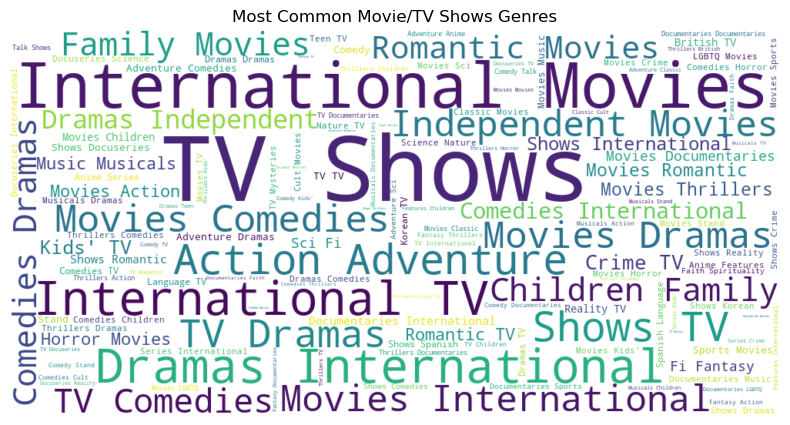

In [83]:
from wordcloud import WordCloud
all_genres = ' '.join(genre['listed_in'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_genres)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Movie/TV Shows Genres')
plt.show()

#### Most movies and TV shows are a combination of a director and an actor.

In [84]:
actor_director= final_df[["cast","title","director","type"]].drop_duplicates(subset=["cast","title","director","type"],keep = "first").reset_index(drop=True)

In [85]:
actor_director.head()

,cast,title,director,type
0,Unknown Actor,Dick Johnson Is Dead,Kirsten Johnson,Movie
1,Ama Qamata,Blood & Water,Unknown director,TV Show
2,Khosi Ngema,Blood & Water,Unknown director,TV Show
3,Gail Mabalane,Blood & Water,Unknown director,TV Show
4,Thabang Molaba,Blood & Water,Unknown director,TV Show


In [86]:
actor_director_group = actor_director.groupby(["cast","director","type"])["title"].size().sort_values(ascending=False).reset_index(name='count')

In [87]:
tv_shows_A_D = actor_director_group.loc[actor_director_group["type"]=="TV Show"]
movie_A_D = actor_director_group.loc[actor_director_group["type"]=="Movie"]

In [88]:
tv_shows_A_D.loc[tv_shows_A_D["director"]!="Unknown director"].head()

,cast,director,type,count
691,David Attenborough,Alastair Fothergill,TV Show,3
1466,Anjali,Gautham Vasudev Menon,TV Show,2
1558,Gautham Vasudev Menon,Gautham Vasudev Menon,TV Show,2
2230,Dave Chappelle,Stan Lathan,TV Show,2
2398,Lee Il-hwa,Shin Won-ho,TV Show,2


The collaboration between actor David Attenborough and director Alastair Fothergill has resulted in the highest number of TV shows, excluding those with unknown directors.

In [89]:
movie_A_D.head()

,cast,director,type,count
1,Unknown Actor,Unknown director,Movie,54
3,Rajesh Kava,Rajiv Chilaka,Movie,19
4,Julie Tejwani,Rajiv Chilaka,Movie,19
5,Rupa Bhimani,Rajiv Chilaka,Movie,18
6,Jigna Bhardwaj,Rajiv Chilaka,Movie,18


The collaboration between actor Rajesh Kava, Julie Tejwani, and director Rajiv Chilaka has resulted in the highest number of movies, excluding those with unknown directors and actors.

#### Movies Avg Run time.

In [90]:
final_df.head()

,show_id,type,title,date_added,release_year,rating,description,cast,director,country,listed_in,new_duration,week,month
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,"As her father nears the end of his life, filmm...",Unknown Actor,Kirsten Johnson,United States,Documentaries,90,Saturday,9.0
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,International TV Shows,2,Friday,9.0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Dramas,2,Friday,9.0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Unknown director,South Africa,TV Mysteries,2,Friday,9.0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Unknown director,South Africa,International TV Shows,2,Friday,9.0


In [91]:
final_df['new_duration'] = pd.to_numeric(final_df['new_duration'], errors='coerce')

In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202058 entries, 0 to 202064
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202058 non-null  object        
 1   type          202058 non-null  object        
 2   title         202058 non-null  object        
 3   date_added    201900 non-null  datetime64[ns]
 4   release_year  202058 non-null  int64         
 5   rating        202058 non-null  object        
 6   description   202058 non-null  object        
 7   cast          202058 non-null  object        
 8   director      202058 non-null  object        
 9   country       202058 non-null  object        
 10  listed_in     202058 non-null  object        
 11  new_duration  202058 non-null  int64         
 12  week          201900 non-null  object        
 13  month         201900 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 23.1

In [93]:
movie_duration = final_df[["type","title","new_duration"]].drop_duplicates(subset=["type","title","new_duration"],keep="first").reset_index(drop=True)

In [94]:
movie_duration.head()

,type,title,new_duration
0,Movie,Dick Johnson Is Dead,90
1,TV Show,Blood & Water,2
2,TV Show,Ganglands,1
3,TV Show,Jailbirds New Orleans,1
4,TV Show,Kota Factory,2


In [95]:
movie_duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   new_duration  8807 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 206.5+ KB


In [96]:
duration_mean = movie_duration.groupby('type')['new_duration'].mean().reset_index()
duration_mean.rename(columns={'new_duration': 'Avg_duration'}, inplace=True)

In [97]:
duration_mean.head()

,type,Avg_duration
0,Movie,99.564998
1,TV Show,1.764948


##### The average run time of movies is 99.5 minutes, and the average TV show season length is 1.7 seasons.

#### Max duration of Movie & TV Show

In [98]:
duration_max = movie_duration.loc[movie_duration.groupby('type')['new_duration'].idxmax()]

In [99]:
duration_max

,type,title,new_duration
4253,Movie,Black Mirror: Bandersnatch,312
548,TV Show,Grey's Anatomy,17


##### The movie "Black Mirror: Bandersnatch" has the longest runtime of 312 minutes, while the TV show "Grey's Anatomy" has the most seasons with 17.